In [1]:
import numpy as np  # Importa la biblioteca NumPy para manejo de arrays.
import matplotlib.pyplot as plt  # Importa la biblioteca Matplotlib para gráficos.
import tensorflow as tf  # Importa TensorFlow para crear y entrenar redes neuronales.
from tensorflow.keras.models import Sequential  # Importa el modelo secuencial de Keras.
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D  
from tensorflow.keras.optimizers import Adam  
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
import cv2  
from sklearn.model_selection import train_test_split  # Importa función para dividir datos en conjuntos de entrenamiento y prueba.
import pandas as pd  # Importa pandas para manejo de datos.
import os  # Importa el módulo OS para manejar operaciones del sistema operativo.
import random  # Importa el módulo random para generar números aleatorios.
import pickle  # Importa el módulo pickle para serialización de objetos.


In [2]:
################# Parámetros #####################
path = "myData"  # Carpeta con todas las clases.
labelFile = 'labels.csv'  # Archivo con los nombres de las clases.
batch_size_val = 55  # Cantidad de datos a procesar juntos.
steps_per_epoch_val = 2000  # Número de pasos por época.
epochs_val = 15  # Número de épocas para el entrenamiento.
imageDimensions = (32, 32, 3)  # Dimensiones de las imágenes.
testRatio = 0.2  # Proporción de datos para prueba.
validationRatio = 0.2  # Proporción de datos para validación.
###################################################

Total Classes Detected: 49
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48  
Data Shapes
Train(22309, 32, 32, 3) (22309,)
Validation(5578, 32, 32, 3) (5578,)
Test(6972, 32, 32, 3) (6972,)
data shape  (49, 2) <class 'pandas.core.frame.DataFrame'>
[113, 1304, 1298, 809, 1137, 1054, 232, 835, 794, 864, 1135, 745, 1196, 1214, 482, 352, 225, 624, 702, 114, 174, 173, 206, 265, 150, 868, 361, 131, 300, 152, 258, 435, 137, 399, 219, 672, 206, 117, 1195, 167, 182, 135, 142, 7, 12, 8, 2, 3, 4]


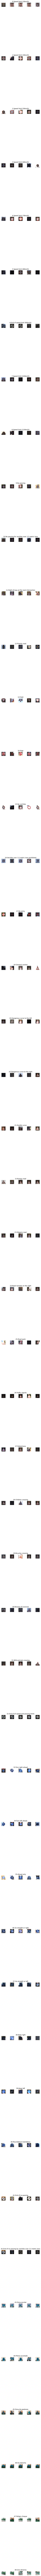

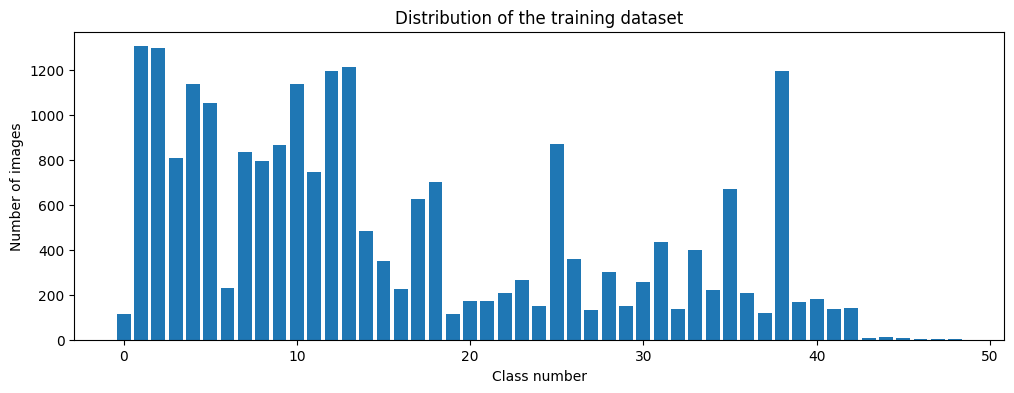

In [3]:
############################### Importación de las imágenes
count = 0  # Inicializa el contador.
images = []  # Lista para almacenar imágenes.
classNo = []  # Lista para almacenar las clases correspondientes.
myList = os.listdir(path)  # Lista las carpetas de clases.
print("Total Classes Detected:", len(myList))  # Imprime el número de clases detectadas.
noOfClasses = len(myList)  # Guarda el número de clases.
print("Importing Classes.....")
for x in range(0, len(myList)):  # Recorre cada clase.
    myPicList = os.listdir(os.path.join(path, str(count)))  # Lista las imágenes en la carpeta de la clase.
    for y in myPicList:  # Recorre cada imagen.
        curImg = cv2.imread(os.path.join(path, str(count), y))  # Lee la imagen.
        images.append(curImg)  # Añade la imagen a la lista.
        classNo.append(count)  # Añade la clase correspondiente a la lista.
    print(count, end=" ")  # Imprime el número de clase.
    count += 1 
print(" ")
resized_images = [cv2.resize(img, (32, 32)) for img in images]  # Redimensiona las imágenes a 32x32 píxeles.
images = np.array(resized_images)  # Convierte la lista de imágenes a un array de NumPy.
classNo = np.array(classNo)  # Convierte la lista de clases a un array de NumPy.

############################### División de los datos
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)  # Divide los datos en entrenamiento y prueba.
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)  # Divide los datos de entrenamiento en entrenamiento y validación.

print("Data Shapes")
print("Train", end=""); print(X_train.shape, y_train.shape)  # Imprime las formas de los datos de entrenamiento.
print("Validation", end=""); print(X_validation.shape, y_validation.shape)  # Imprime las formas de los datos de validación.
print("Test", end=""); print(X_test.shape, y_test.shape)  # Imprime las formas de los datos de prueba.
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels in the training set"  # Verifica que el número de imágenes sea igual al número de etiquetas en el conjunto de entrenamiento.
assert(X_validation.shape[0] == y_validation.shape[0]), "The number of images is not equal to the number of labels in the validation set"  # Verifica que el número de imágenes sea igual al número de etiquetas en el conjunto de validación.
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels in the test set"  # Verifica que el número de imágenes sea igual al número de etiquetas en el conjunto de prueba.
assert(X_train.shape[1:] == (imageDimensions)), "The dimensions of the training images are wrong"  # Verifica las dimensiones de las imágenes de entrenamiento.
assert(X_validation.shape[1:] == (imageDimensions)), "The dimensions of the validation images are wrong"  # Verifica las dimensiones de las imágenes de validación.
assert(X_test.shape[1:] == (imageDimensions)), "The dimensions of the test images are wrong"  # Verifica las dimensiones de las imágenes de prueba.

############################### Lectura del archivo CSV
data = pd.read_csv(labelFile)  # Lee el archivo CSV con los nombres de las clases.
print("data shape ", data.shape, type(data))  # Imprime la forma y el tipo de datos.

############################### Mostrar algunas muestras de todas las clases
num_of_samples = []  # Lista para almacenar el número de muestras por clase.
cols = 5  # Número de columnas en la visualización.
num_classes = noOfClasses  # Número de clases.
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5, 300))  # Crea una figura con subplots.
fig.tight_layout()  # Ajusta el layout de la figura.
for i in range(cols):  # Recorre cada columna.
    for j, row in data.iterrows():  # Recorre cada fila en el DataFrame.
        x_selected = X_train[y_train == j]  # Selecciona las imágenes de la clase actual.
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) - 1), :, :], cmap=plt.get_cmap("gray"))  # Muestra una imagen aleatoria de la clase.
        axs[j][i].axis("off")  # Apaga los ejes.
        if i == 2:  # Si es la tercera columna.
            axs[j][i].set_title(str(j) + "-" + row["Name"])  # Establece el título del subplot con el número de clase y nombre.
            num_of_samples.append(len(x_selected))  # Añade el número de muestras a la lista.

print(num_of_samples)  # Imprime el número de muestras por clase.
plt.figure(figsize=(12, 4))  # Crea una nueva figura.
plt.bar(range(0, num_classes), num_of_samples)  # Crea un gráfico de barras con la distribución de las clases.
plt.title("Distribution of the training dataset")  # Establece el título del gráfico.
plt.xlabel("Class number")  # Establece la etiqueta del eje X.
plt.ylabel("Number of images")  # Establece la etiqueta del eje Y.
plt.show()  # Muestra el gráfico.

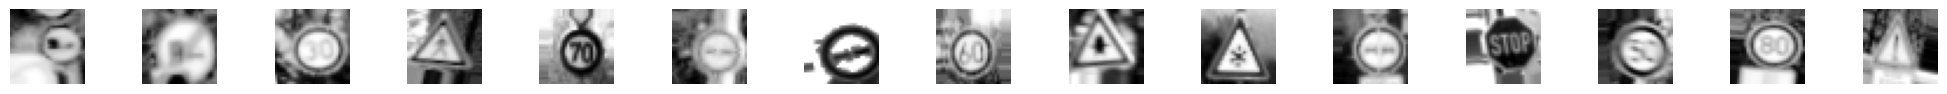

In [4]:
############################### Preprocesamiento de las imágenes
def grayscale(img):  # Función para convertir una imagen a escala de grises.
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convierte la imagen a escala de grises.
    return img

def equalize(img):  # Función para igualar el histograma de la imagen.
    img = cv2.equalizeHist(img)  # Igualiza el histograma.
    return img

def preprocessing(img):  # Función para preprocesar una imagen.
    img = grayscale(img)  # Convierte a escala de grises.
    img = equalize(img)  # Igualiza el histograma.
    img = img / 255  # Normaliza los valores entre 0 y 1.
    return img

X_train = np.array(list(map(preprocessing, X_train)))  # Preprocesa todas las imágenes de entrenamiento.
X_validation = np.array(list(map(preprocessing, X_validation)))  # Preprocesa todas las imágenes de validación.
X_test = np.array(list(map(preprocessing, X_test)))  # Preprocesa todas las imágenes de prueba.
cv2.imshow("GrayScale Images", X_train[random.randint(0, len(X_train) - 1)])  # Muestra una imagen preprocesada de entrenamiento.

############################### Añadir una profundidad de 1
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)  # Ajusta la forma de los datos de entrenamiento.
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1], X_validation.shape[2], 1)  # Ajusta la forma de los datos de validación.
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)  # Ajusta la forma de los datos de prueba.

############################### Aumentación de imágenes: para hacerlas más genéricas
dataGen = ImageDataGenerator(width_shift_range=0.1,  # Desplazamiento horizontal del 10%.
                             height_shift_range=0.1,  # Desplazamiento vertical del 10%.
                             zoom_range=0.2,  # Zoom del 20%.
                             shear_range=0.1,  # Ángulo de cizallamiento del 10%.
                             rotation_range=10)  # Rotación de 10 grados.
dataGen.fit(X_train)  # Ajusta el generador de datos a las imágenes de entrenamiento.
batches = dataGen.flow(X_train, y_train, batch_size=20)  # Genera lotes de imágenes aumentadas.
X_batch, y_batch = next(batches)  # Obtiene el siguiente lote de imágenes.

# Mostrar muestras de imágenes aumentadas
fig, axs = plt.subplots(1, 15, figsize=(20, 5))  # Crea una figura con subplots.
fig.tight_layout()  # Ajusta el layout.
for i in range(15):  # Recorre cada subplot.
    axs[i].imshow(X_batch[i].reshape(imageDimensions[0], imageDimensions[1]), cmap='gray')  # Muestra una imagen aumentada.
    axs[i].axis('off')  # Apaga los ejes.
plt.show()  # Muestra la figura.

y_train = to_categorical(y_train, noOfClasses)  # Convierte las etiquetas de entrenamiento a formato categórico.
y_validation = to_categorical(y_validation, noOfClasses)  # Convierte las etiquetas de validación a formato categórico.
y_test = to_categorical(y_test, noOfClasses)  # Convierte las etiquetas de prueba a formato categórico.

c:\Users\mateo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 60)     │         1,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 60)     │        90,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 60)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 30)     │        16,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 30)       │         8,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4, 4, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       240,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 49)             │        24,549 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 381,029 (1.45 MB)

 Trainable params: 381,029 (1.45 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15


c:\Users\mateo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 406/2000 ━━━━━━━━━━━━━━━━━━━━ 4:33 172ms/step - accuracy: 0.1188 - loss: 3.3150

c:\Users\mateo\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 78s 38ms/step - accuracy: 0.2201 - loss: 2.8697 - val_accuracy: 0.6925 - val_loss: 1.0232
Epoch 2/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 74s 37ms/step - accuracy: 0.5945 - loss: 1.3402 - val_accuracy: 0.8960 - val_loss: 0.3795
Epoch 3/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 75s 37ms/step - accuracy: 0.7305 - loss: 0.8805 - val_accuracy: 0.9416 - val_loss: 0.2193
Epoch 4/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 77s 38ms/step - accuracy: 0.8019 - loss: 0.6541 - val_accuracy: 0.9509 - val_loss: 0.1650
Epoch 5/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.8329 - loss: 0.5500 - val_accuracy: 0.9702 - val_loss: 0.1237
Epoch 6/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 88s 44ms/step - accuracy: 0.8518 - loss: 0.4770 - val_accuracy: 0.9649 - val_loss: 0.1149
Epoch 7/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 89s 44ms/step - accuracy: 0.8721 - loss: 0.4160 - val_accuracy: 0.9729 - val_loss: 0.0867
Epoch 8/15
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 89s 44ms/step - accuracy: 0.8868 - loss: 0.36

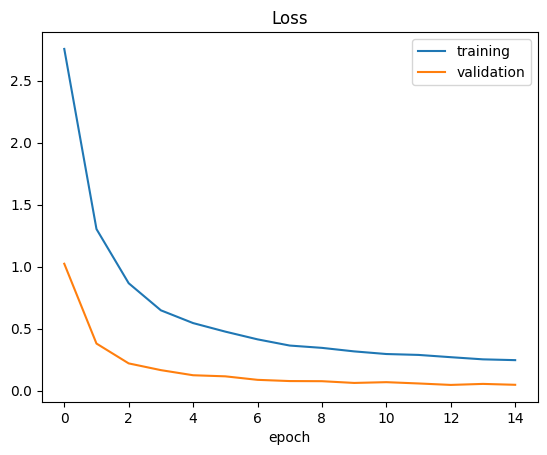

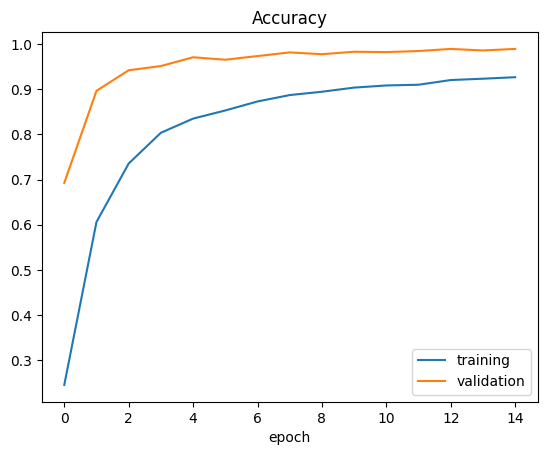

Test Score: 0.0397036038339138
Test Accuracy: 0.9885255098342896


: 

In [5]:
############################### Modelo de red neuronal convolucional
def myModel():  # Define la estructura del modelo.
    no_Of_Filters = 60  # Número de filtros en la primera capa.
    size_of_Filter = (5, 5)  # Tamaño del kernel para la primera capa.
    size_of_Filter2 = (3, 3)  # Tamaño del kernel para la segunda capa.
    size_of_pool = (2, 2)  # Tamaño de la ventana de pooling.
    no_Of_Nodes = 500  # Número de nodos en las capas ocultas.
    model = Sequential()  # Inicializa un modelo secuencial.
    model.add(Conv2D(no_Of_Filters, size_of_Filter, input_shape=(imageDimensions[0], imageDimensions[1], 1), activation='relu'))  # Añade una capa de convolución.
    model.add(Conv2D(no_Of_Filters, size_of_Filter, activation='relu'))  # Añade otra capa de convolución.
    model.add(MaxPooling2D(pool_size=size_of_pool))  # Añade una capa de pooling.

    model.add(Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu'))  # Añade una capa de convolución con menos filtros.
    model.add(Conv2D(no_Of_Filters // 2, size_of_Filter2, activation='relu'))  # Añade otra capa de convolución con menos filtros.
    model.add(MaxPooling2D(pool_size=size_of_pool))  # Añade una capa de pooling.
    model.add(Dropout(0.5))  # Añade una capa de dropout para prevenir el sobreajuste.

    model.add(Flatten())  # Aplana las dimensiones.
    model.add(Dense(no_Of_Nodes, activation='relu'))  # Añade una capa densa con 500 nodos.
    model.add(Dropout(0.5))  # Añade otra capa de dropout.
    model.add(Dense(noOfClasses, activation='softmax'))  # Añade la capa de salida con activación softmax.
    model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])  # Compila el modelo.
    return model

############################### Entrenamiento
model = myModel()  # Inicializa el modelo.
print(model.summary())  # Imprime un resumen de la estructura del modelo.
history = model.fit(dataGen.flow(X_train, y_train, batch_size=batch_size_val), steps_per_epoch=steps_per_epoch_val, epochs=epochs_val, validation_data=(X_validation, y_validation), shuffle=True)  # Entrena el modelo.

############################### Gráficos
plt.figure(1)
plt.plot(history.history['loss'])  # Gráfico de la pérdida de entrenamiento.
plt.plot(history.history['val_loss'])  # Gráfico de la pérdida de validación.
plt.legend(['training', 'validation'])  # Leyenda.
plt.title('Loss')  # Título del gráfico.
plt.xlabel('epoch')  # Etiqueta del eje X.
plt.figure(2)
plt.plot(history.history['accuracy'])  # Gráfico de la precisión de entrenamiento.
plt.plot(history.history['val_accuracy'])  # Gráfico de la precisión de validación.
plt.legend(['training', 'validation'])  # Leyenda.
plt.title('Accuracy')  # Título del gráfico.
plt.xlabel('epoch')  # Etiqueta del eje X.
plt.show()  # Muestra los gráficos.
score = model.evaluate(X_test, y_test, verbose=0)  # Evalúa el modelo con los datos de prueba.
print('Test Score:', score[0])  # Imprime la puntuación de prueba.
print('Test Accuracy:', score[1])  # Imprime la precisión de prueba.

model.save('my_model.keras')  # Guarda el modelo entrenado.